# Import Module

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
mnist = tf.keras.datasets.mnist

# Split Data

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

# Define model

In [4]:
CLASSES = len(np.unique(y_train))

LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: ram://16c049ff-d631-4706-a3d5-380eba1a3e68/assets


INFO:tensorflow:Assets written to: ram://16c049ff-d631-4706-a3d5-380eba1a3e68/assets


# Compile model

In [5]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS)

INFO:tensorflow:Assets written to: ram://898f7691-86b0-448e-a652-015adb697631/assets


INFO:tensorflow:Assets written to: ram://898f7691-86b0-448e-a652-015adb697631/assets


INFO:tensorflow:Assets written to: ram://b4e56762-4477-4886-8f78-0d9ff680dc20/assets


INFO:tensorflow:Assets written to: ram://b4e56762-4477-4886-8f78-0d9ff680dc20/assets


# Train model

In [6]:
EPOCHS = 5

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

INFO:tensorflow:Assets written to: ram://2de35057-1f9e-47b5-83dd-2796d04bc6ea/assets


INFO:tensorflow:Assets written to: ram://2de35057-1f9e-47b5-83dd-2796d04bc6ea/assets


INFO:tensorflow:Assets written to: ram://2120c717-fba6-4526-82e2-60ea5b36ff64/assets


INFO:tensorflow:Assets written to: ram://2120c717-fba6-4526-82e2-60ea5b36ff64/assets


Epoch 1/5
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6041 - val_loss: 0.3027
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2875 - val_loss: 0.2356
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2344 - val_loss: 0.2038
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2006 - val_loss: 0.1784
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1756 - val_loss: 0.1569


INFO:tensorflow:Assets written to: ram://0780917f-a9c2-4a84-b22f-0424cba46617/assets


INFO:tensorflow:Assets written to: ram://0780917f-a9c2-4a84-b22f-0424cba46617/assets


INFO:tensorflow:Assets written to: ram://3ddbb42e-9880-40a8-911b-caaebcae13ba/assets


INFO:tensorflow:Assets written to: ram://3ddbb42e-9880-40a8-911b-caaebcae13ba/assets


# Evaluate model

In [7]:
model_clf.evaluate(X_test, y_test)

INFO:tensorflow:Assets written to: ram://09cc7505-52e2-450c-9cbc-616e6ca57d2b/assets


INFO:tensorflow:Assets written to: ram://09cc7505-52e2-450c-9cbc-616e6ca57d2b/assets


INFO:tensorflow:Assets written to: ram://89552a25-90e1-43df-a022-d206ebce015e/assets


INFO:tensorflow:Assets written to: ram://89552a25-90e1-43df-a022-d206ebce015e/assets


INFO:tensorflow:Assets written to: ram://48f46fd5-44c2-41b8-9950-8c6a6b5bd036/assets


INFO:tensorflow:Assets written to: ram://48f46fd5-44c2-41b8-9950-8c6a6b5bd036/assets


INFO:tensorflow:Assets written to: ram://b08652bf-aad4-4b83-bab4-98b82bba0483/assets


INFO:tensorflow:Assets written to: ram://b08652bf-aad4-4b83-bab4-98b82bba0483/assets


313/313 [==============================] - 1s 3ms/step - loss: 0.1690


INFO:tensorflow:Assets written to: ram://5252cdf4-f41d-4efe-93a9-936d706aa3bf/assets


INFO:tensorflow:Assets written to: ram://5252cdf4-f41d-4efe-93a9-936d706aa3bf/assets


INFO:tensorflow:Assets written to: ram://52c7647f-d3b1-4400-b0bd-15b83399e458/assets


INFO:tensorflow:Assets written to: ram://52c7647f-d3b1-4400-b0bd-15b83399e458/assets


0.1689971685409546

# Save model

In [8]:
model_clf.save("mnist_full.h5")

INFO:tensorflow:Assets written to: ram://80029625-341e-4a47-8b21-5015a61e5b0c/assets


INFO:tensorflow:Assets written to: ram://80029625-341e-4a47-8b21-5015a61e5b0c/assets


INFO:tensorflow:Assets written to: ram://bd4c2377-6d63-47c0-a765-fec223ed778b/assets


INFO:tensorflow:Assets written to: ram://bd4c2377-6d63-47c0-a765-fec223ed778b/assets


INFO:tensorflow:Assets written to: ram://c8e710e7-f090-44c5-b9d2-5b6e3d6338b0/assets


INFO:tensorflow:Assets written to: ram://c8e710e7-f090-44c5-b9d2-5b6e3d6338b0/assets


INFO:tensorflow:Assets written to: ram://417dac90-9204-4cb8-b58a-6c71ba1946b4/assets


INFO:tensorflow:Assets written to: ram://417dac90-9204-4cb8-b58a-6c71ba1946b4/assets


INFO:tensorflow:Assets written to: ram://c73e6083-647d-43f4-8bbf-61ab3ccfb31a/assets


INFO:tensorflow:Assets written to: ram://c73e6083-647d-43f4-8bbf-61ab3ccfb31a/assets


INFO:tensorflow:Assets written to: ram://51622aee-b6e5-4bcc-a5e0-dae1a4babeca/assets


INFO:tensorflow:Assets written to: ram://51622aee-b6e5-4bcc-a5e0-dae1a4babeca/assets


INFO:tensorflow:Assets written to: ram://90ebe231-8e3f-4e0f-b2c6-dfe3e25b1ffc/assets


INFO:tensorflow:Assets written to: ram://90ebe231-8e3f-4e0f-b2c6-dfe3e25b1ffc/assets


INFO:tensorflow:Assets written to: ram://5e5c93d1-93c7-450d-8222-6604678cd069/assets


INFO:tensorflow:Assets written to: ram://5e5c93d1-93c7-450d-8222-6604678cd069/assets


# Inferencing

INFO:tensorflow:Assets written to: ram://709b1242-0380-4bf7-a9a3-68ced3c01419/assets


INFO:tensorflow:Assets written to: ram://709b1242-0380-4bf7-a9a3-68ced3c01419/assets


INFO:tensorflow:Assets written to: ram://c3f49d0e-daa2-45b1-9263-f61e6e019ad4/assets


INFO:tensorflow:Assets written to: ram://c3f49d0e-daa2-45b1-9263-f61e6e019ad4/assets


INFO:tensorflow:Assets written to: ram://f2522daa-ba44-4a5b-ac33-ef33ac5b27ad/assets


INFO:tensorflow:Assets written to: ram://f2522daa-ba44-4a5b-ac33-ef33ac5b27ad/assets


INFO:tensorflow:Assets written to: ram://9137e616-1ab1-4e3b-a1f4-f7115fc1d232/assets


INFO:tensorflow:Assets written to: ram://9137e616-1ab1-4e3b-a1f4-f7115fc1d232/assets


INFO:tensorflow:Assets written to: ram://51aacd9a-aa47-4ac4-8e72-23b0577f5342/assets


INFO:tensorflow:Assets written to: ram://51aacd9a-aa47-4ac4-8e72-23b0577f5342/assets


INFO:tensorflow:Assets written to: ram://fa4a5e37-416a-48f4-8e36-2e969e7395cc/assets


INFO:tensorflow:Assets written to: ram://fa4a5e37-416a-48f4-8e36-2e969e7395cc/assets


INFO:tensorflow:Assets written to: ram://79eaa229-ccc1-4040-89e5-2d8f41b4750a/assets


INFO:tensorflow:Assets written to: ram://79eaa229-ccc1-4040-89e5-2d8f41b4750a/assets


INFO:tensorflow:Assets written to: ram://40751365-85c7-4ceb-b7b8-e682f156dcf6/assets


INFO:tensorflow:Assets written to: ram://40751365-85c7-4ceb-b7b8-e682f156dcf6/assets


1/1 [==============================] - 0s 112ms/step


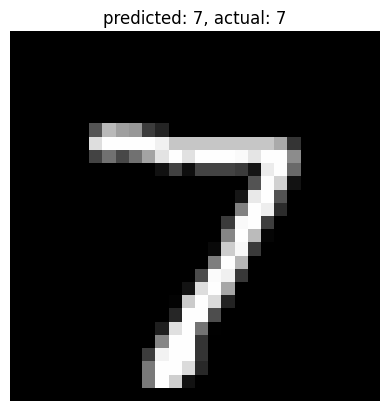

------------------------------------------------------------


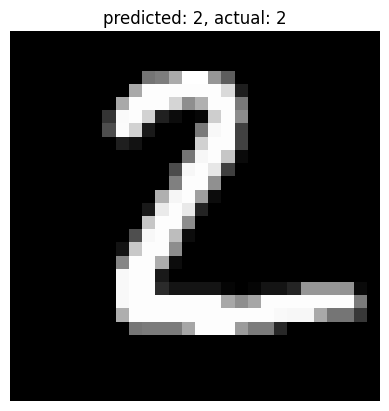

------------------------------------------------------------


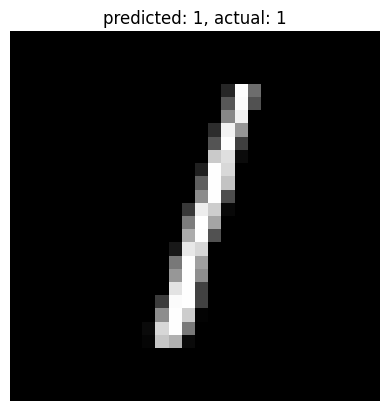

------------------------------------------------------------


INFO:tensorflow:Assets written to: ram://f0a46a72-f832-4867-88cc-8b8d60c94c4a/assets


INFO:tensorflow:Assets written to: ram://f0a46a72-f832-4867-88cc-8b8d60c94c4a/assets


INFO:tensorflow:Assets written to: ram://127fcac2-f82c-4fb0-9a64-fc45a45f8b87/assets


INFO:tensorflow:Assets written to: ram://127fcac2-f82c-4fb0-9a64-fc45a45f8b87/assets


In [9]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
Y_pred = np.argmax(y_prob, axis=-1)

for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)